In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Load data 
df = pd.read_csv("online_retail_II.csv")
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERR

In [3]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [4]:

df.dropna(subset=['Customer ID'], inplace=True) # remove rows without customer id

df = df[df['Quantity'] > 0]  
df = df[df['Price'] > 0]

df['Sales'] = df['Quantity'] * df['Price']# creating sales column for better visualisation


df.rename(columns={'InvoiceDate': 'Date'}, inplace=True)# renaming the column

df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)#converting [date] to proper date fromat 

df['Year'] = df['Date'].dt.year

df = df[df['Year'] != 2009].copy()
print(df.head())
df.info()

      Invoice StockCode                      Description  Quantity  \
45228  493410   TEST001          This is a test product.         5   
45230  493412   TEST001          This is a test product.         5   
45234  493414     21844                   RETRO SPOT MUG        36   
45235  493414     21533        RETRO SPOT LARGE MILK JUG        12   
45236  493414     37508  NEW ENGLAND CERAMIC CAKE SERVER         2   

                     Date  Price  Customer ID         Country  Sales  Year  
45228 2010-01-04 09:24:00   4.50      12346.0  United Kingdom   22.5  2010  
45230 2010-01-04 09:53:00   4.50      12346.0  United Kingdom   22.5  2010  
45234 2010-01-04 10:28:00   2.55      14590.0  United Kingdom   91.8  2010  
45235 2010-01-04 10:28:00   4.25      14590.0  United Kingdom   51.0  2010  
45236 2010-01-04 10:28:00   2.55      14590.0  United Kingdom    5.1  2010  
<class 'pandas.core.frame.DataFrame'>
Index: 762555 entries, 45228 to 1048574
Data columns (total 10 columns):
 #   C

In [5]:
df

,Invoice,StockCode,Description,Quantity,Date,Price,Customer ID,Country,Sales,Year
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,22.50,2010
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,22.50,2010
45234,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,91.80,2010
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,United Kingdom,51.00,2010
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,5.10,2010
...,...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom,16.50,2011
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom,14.85,2011
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom,4.95,2011
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.0,United Kingdom,5.78,2011


In [6]:

def get_festival_details_2011(date):
    if (date.month == 4 and 22 <= date.day <= 25):
        return 'Festival', 'Easter Weekend'
    elif (date.month == 10 and 24 <= date.day <= 31):
        return 'Festival', 'Halloween Week'
    elif (date.month == 11 and date.day == 5):
        return 'Festival', 'Bonfire Night'
    elif (date.month == 11 and date.day >= 25) or (date.month == 12 and date.day <= 24):
        return 'Festival', 'Christmas Season'
    else:
        return 'Non-Festival', np.nan

#here we apply the function to every date column of the data 
df[['Festival_Status', 'Festival_Name']] = df['Date'].apply(get_festival_details_2011).apply(pd.Series)

print("Created 'Festival_Status' and 'Festival_Name' columns with Halloween.")
print("\nFestivals found in the dataset:")
print(df['Festival_Name'].value_counts())
print("\nOverall Status Count:")
print(df['Festival_Status'].value_counts())

Created 'Festival_Status' and 'Festival_Name' columns with Halloween.

Festivals found in the dataset:
Festival_Name
Christmas Season    69582
Halloween Week      26914
Easter Weekend       3457
Bonfire Night        1430
Name: count, dtype: int64

Overall Status Count:
Festival_Status
Non-Festival    661172
Festival        101383
Name: count, dtype: int64


In [7]:
df

,Invoice,StockCode,Description,Quantity,Date,Price,Customer ID,Country,Sales,Year,Festival_Status,Festival_Name
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,22.50,2010,Non-Festival,NaN
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,22.50,2010,Non-Festival,NaN
45234,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,91.80,2010,Non-Festival,NaN
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,United Kingdom,51.00,2010,Non-Festival,NaN
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,United Kingdom,5.10,2010,Non-Festival,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom,16.50,2011,Festival,Christmas Season
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom,14.85,2011,Festival,Christmas Season
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom,4.95,2011,Festival,Christmas Season
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.0,United Kingdom,5.78,2011,Festival,Christmas Season


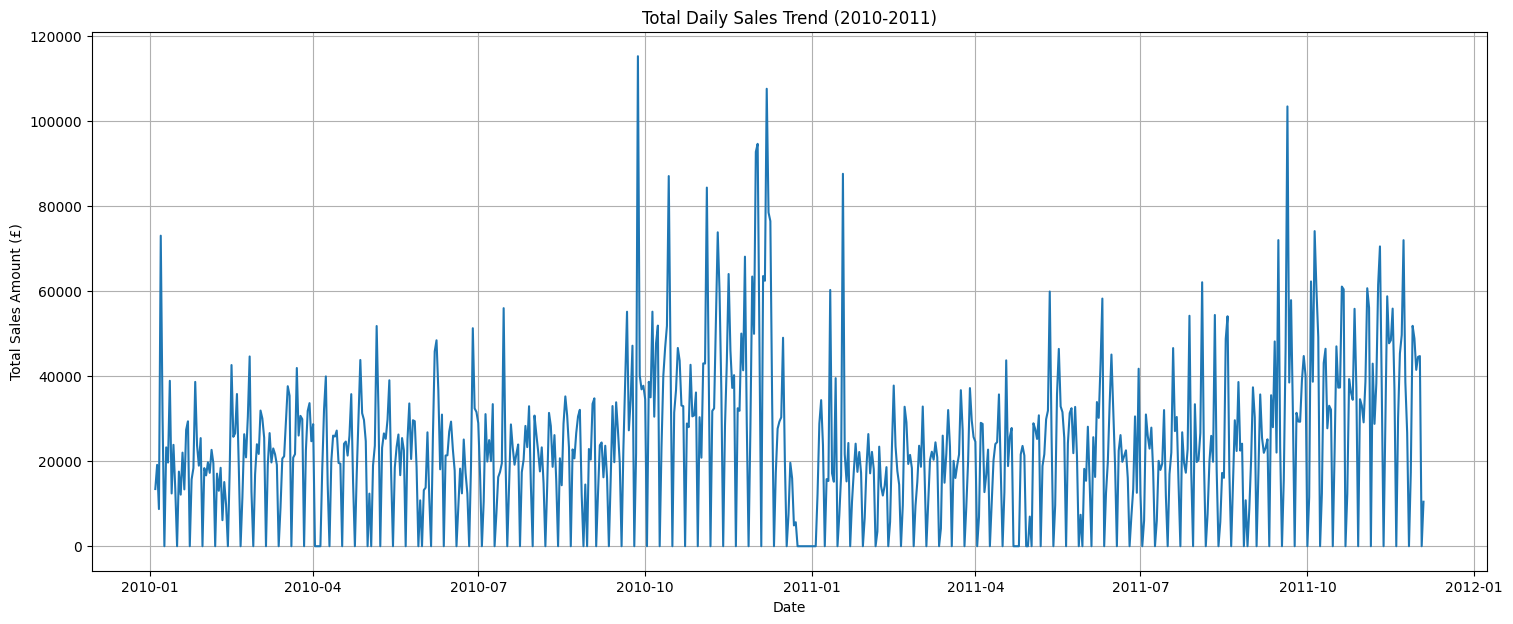

In [8]:

daily_sales = df.set_index('Date')['Sales'].resample('D').sum().reset_index()
# here 1st set_index() with make date column as index and then resample ()will take all the transaction in a particular date and groups them 

plt.figure(figsize=(18, 7))
sns.lineplot(data=daily_sales, x='Date', y='Sales')
plt.title('Total Daily Sales Trend (2010-2011)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (£)')
plt.grid(True)
plt.show()

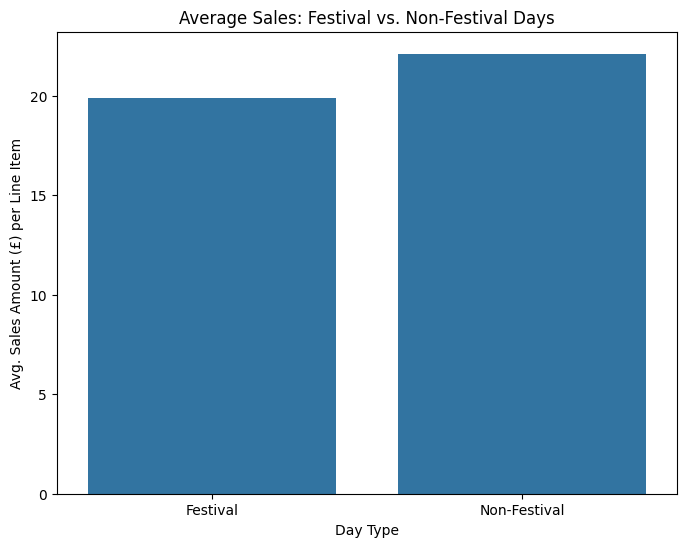

In [9]:
status_comparison = df.groupby('Festival_Status')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=status_comparison, x='Festival_Status', y='Sales')
plt.title('Average Sales: Festival vs. Non-Festival Days')
plt.xlabel('Day Type')
plt.ylabel('Avg. Sales Amount (£) per Line Item')
plt.show()

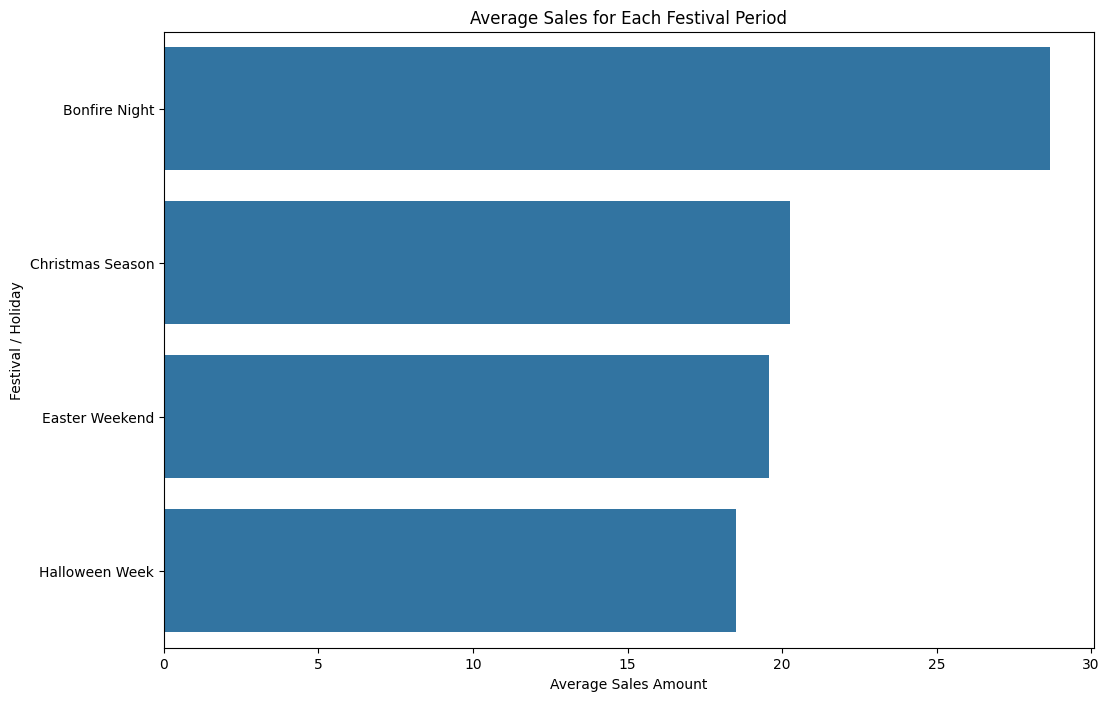

In [10]:
festival_only_df = df[df['Festival_Status'] == 'Festival']


festival_name_comparison = festival_only_df.groupby('Festival_Name')['Sales'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=festival_name_comparison, x='Sales', y='Festival_Name')
plt.title('Average Sales for Each Festival Period')
plt.xlabel('Average Sales Amount')
plt.ylabel('Festival / Holiday')
plt.show()

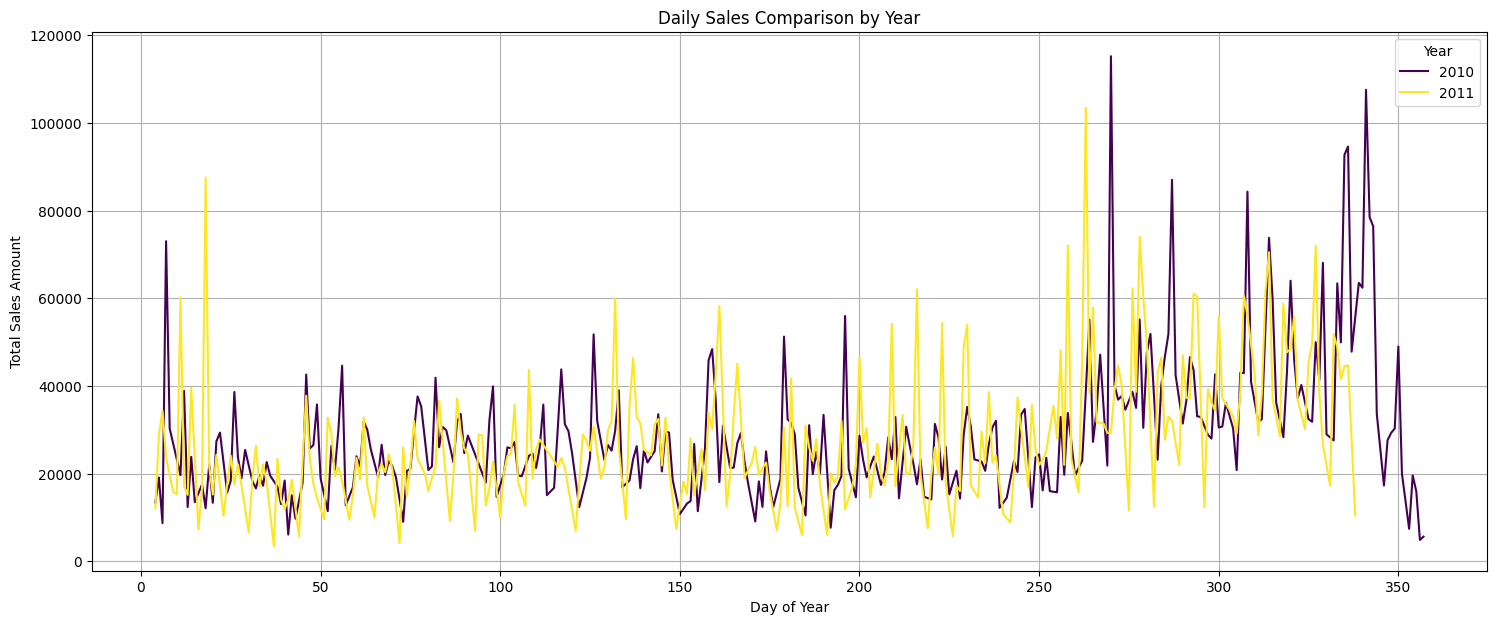

In [11]:
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear

daily_sales_yearly = df.groupby(['Year', 'DayOfYear'])['Sales'].sum().reset_index()


plt.figure(figsize=(18, 7))
sns.lineplot(data=daily_sales_yearly, x='DayOfYear', y='Sales', hue='Year', palette='viridis')
# palette='viridis' sets the predefined color sceme for the plot

plt.title('Daily Sales Comparison by Year')
plt.xlabel('Day of Year')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend(title='Year')
plt.show()

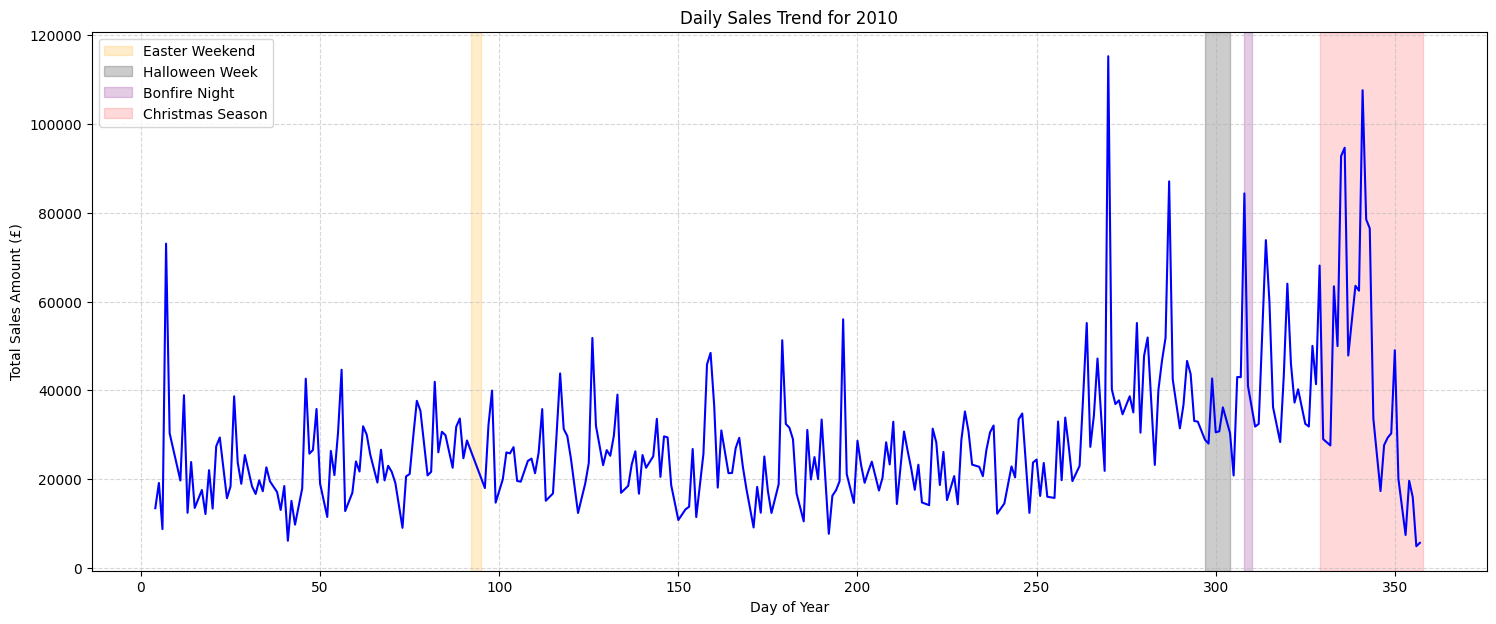

In [12]:
df_2010 = df[df['Year'] == 2010].copy()
daily_sales_2010 = df_2010.groupby('DayOfYear')['Sales'].sum().reset_index()

plt.figure(figsize=(18, 7))
sns.lineplot(data=daily_sales_2010, x='DayOfYear', y='Sales', color='blue')

# axvspan() draws a shaded part on the given duration

plt.axvspan(pd.to_datetime('2010-04-02').dayofyear, 
            pd.to_datetime('2010-04-05').dayofyear, 
            color='orange', alpha=0.2, label='Easter Weekend')

plt.axvspan(pd.to_datetime('2010-10-24').dayofyear, 
            pd.to_datetime('2010-10-31').dayofyear, 
            color='black', alpha=0.2, label='Halloween Week')

plt.axvspan(pd.to_datetime('2010-11-05').dayofyear - 1, 
            pd.to_datetime('2010-11-05').dayofyear + 1, 
            color='purple', alpha=0.2, label='Bonfire Night')

plt.axvspan(pd.to_datetime('2010-11-25').dayofyear, 
            pd.to_datetime('2010-12-24').dayofyear, 
            color='red', alpha=0.15, label='Christmas Season')
plt.title('Daily Sales Trend for 2010')
plt.xlabel('Day of Year')
plt.ylabel('Total Sales Amount (£)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

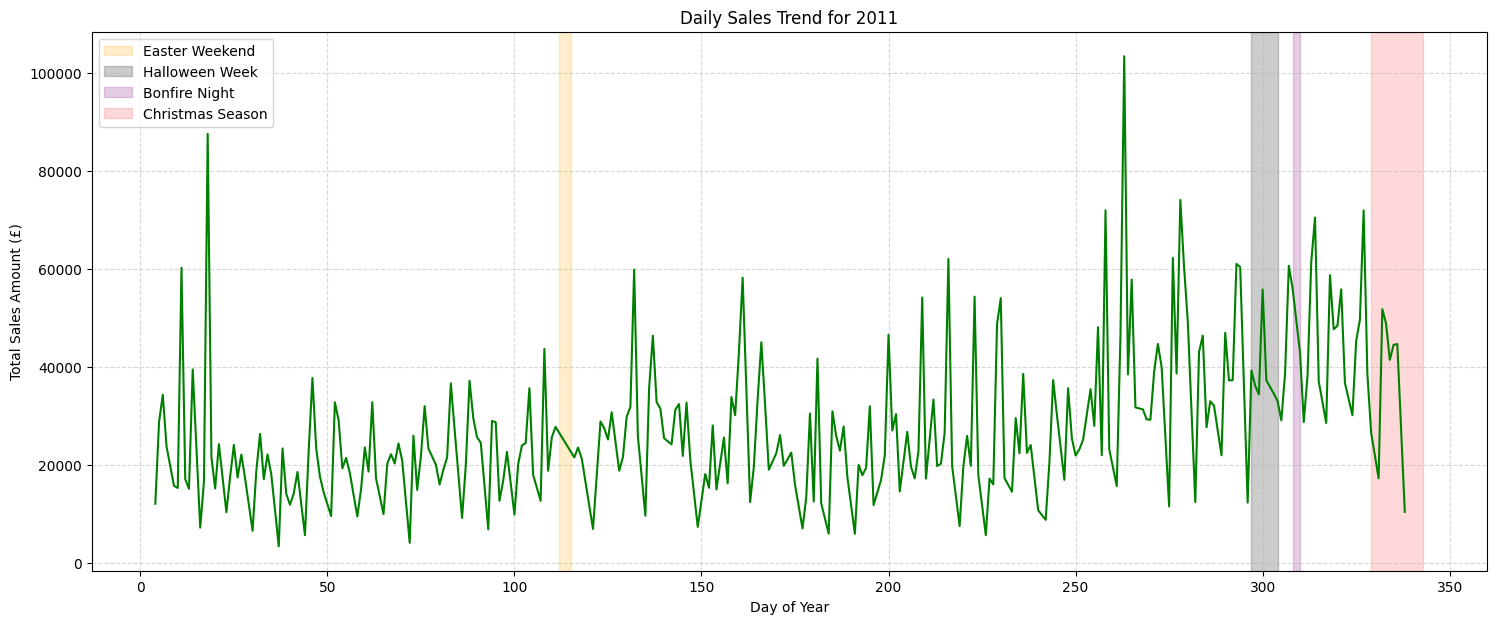

In [13]:
df_2011 = df[df['Year'] == 2011].copy()
daily_sales_2011 = df_2011.groupby('DayOfYear')['Sales'].sum().reset_index()

plt.figure(figsize=(18, 7))
sns.lineplot(data=daily_sales_2011, x='DayOfYear', y='Sales', color='green')
plt.axvspan(pd.to_datetime('2011-04-22').dayofyear, 
            pd.to_datetime('2011-04-25').dayofyear, 
            color='orange', alpha=0.2, label='Easter Weekend')

# Add Halloween Week
plt.axvspan(pd.to_datetime('2011-10-24').dayofyear, 
            pd.to_datetime('2011-10-31').dayofyear, 
            color='black', alpha=0.2, label='Halloween Week')

plt.axvspan(pd.to_datetime('2011-11-05').dayofyear - 1, 
            pd.to_datetime('2011-11-05').dayofyear + 1, 
            color='purple', alpha=0.2, label='Bonfire Night')

plt.axvspan(pd.to_datetime('2011-11-25').dayofyear, 
            pd.to_datetime('2011-12-09').dayofyear, 
            color='red', alpha=0.15, label='Christmas Season')
plt.title('Daily Sales Trend for 2011')
plt.xlabel('Day of Year')
plt.ylabel('Total Sales Amount (£)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

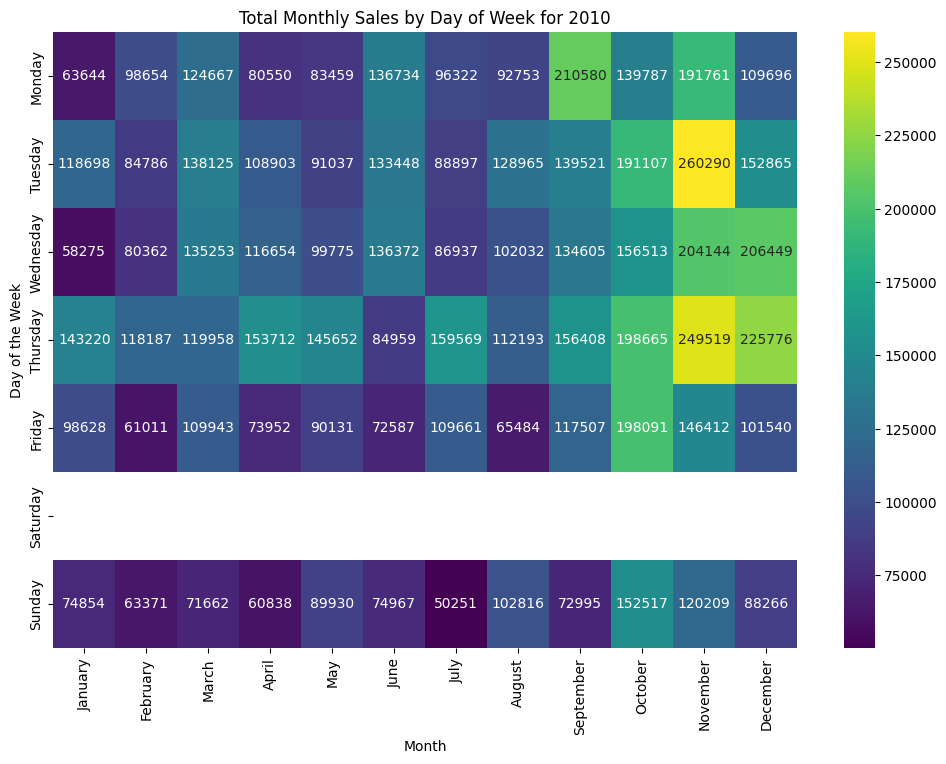

In [14]:
df_2010['Month'] = df_2010['Date'].dt.month_name()
df_2010['DayOfWeek'] = df_2010['Date'].dt.day_name()

# pivot_table() takes you data and convert it to spread sheet like tabels
heatmap_data = df_2010.pivot_table(index='DayOfWeek', 
                                   columns='Month', 
                                   values='Sales', 
                                   aggfunc='sum')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=day_order, columns=month_order)

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Total Monthly Sales by Day of Week for 2010')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

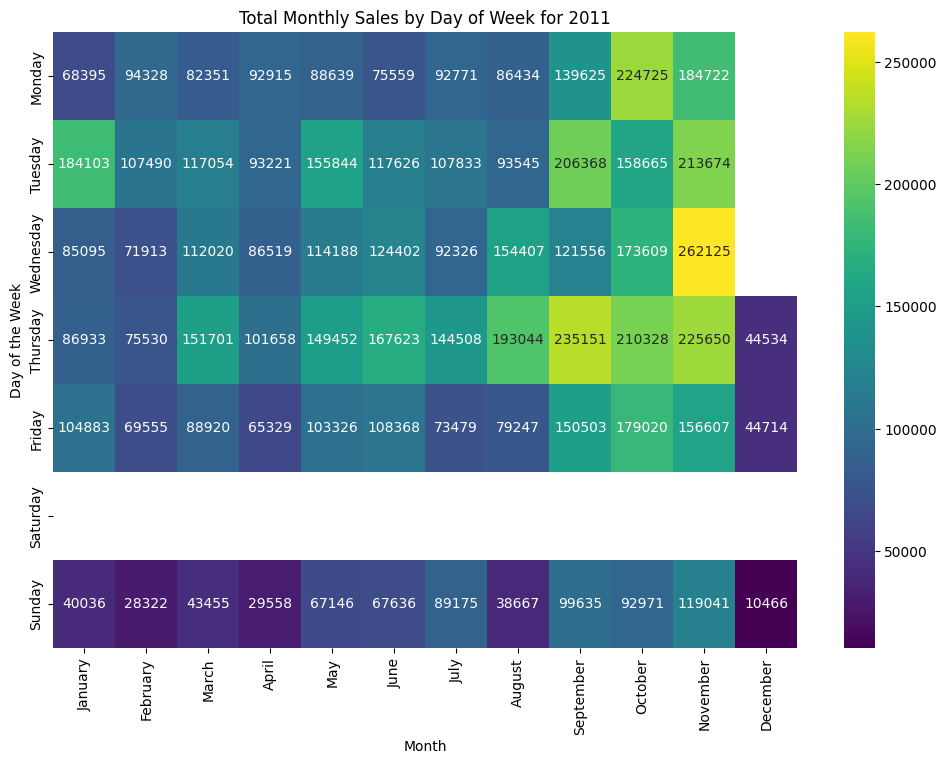

In [15]:
# Filter the data to include only the year 2011
df_2011 = df[df['Year'] == 2011].copy()

# Create 'Month' and 'Day of Week' columns
df_2011['Month'] = df_2011['Date'].dt.month_name()
df_2011['DayOfWeek'] = df_2011['Date'].dt.day_name()

# Creat
heatmap_data_2011 = df_2011.pivot_table(index='DayOfWeek', 
                                     columns='Month', 
                                     values='Sales', 
                                     aggfunc='sum')

# Order the heatmap correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data_2011 = heatmap_data_2011.reindex(index=day_order, columns=month_order)

# Create the plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_2011, cmap='viridis', annot=True, fmt=".0f")
# Update the title to reflect the change
plt.title('Total Monthly Sales by Day of Week for 2011')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10404\882803880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=festival_sales_comparison, x='Year', y='Sales', palette=['blue', 'green'])


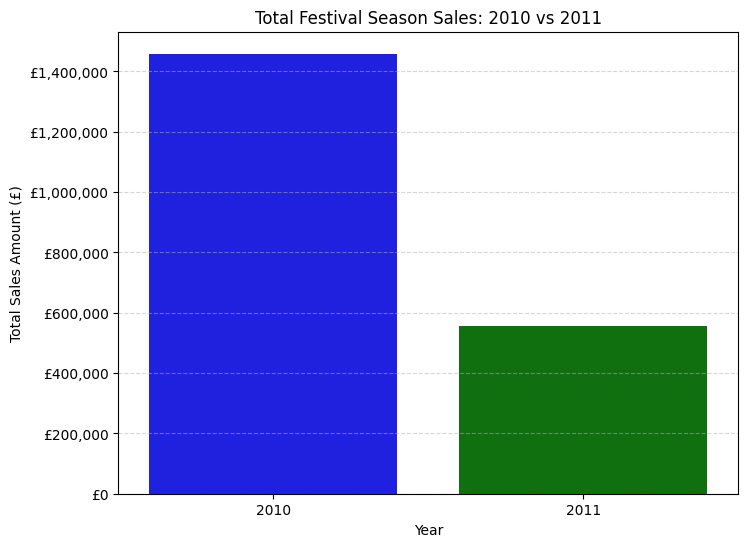

In [16]:

festival_df = df[df['Festival_Status'] == 'Festival'].copy()
festival_sales_by_year = festival_df.groupby('Year')['Sales'].sum().reset_index()
festival_sales_comparison = festival_sales_by_year[festival_sales_by_year['Year'].isin([2010, 2011])]
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=festival_sales_comparison, x='Year', y='Sales', palette=['blue', 'green'])

# for bars in ax.containers:
#     ax.bar_label(bars, fmt='£{:,.0f}'

plt.title('Total Festival Season Sales: 2010 vs 2011')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount (£)')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))


plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.show()

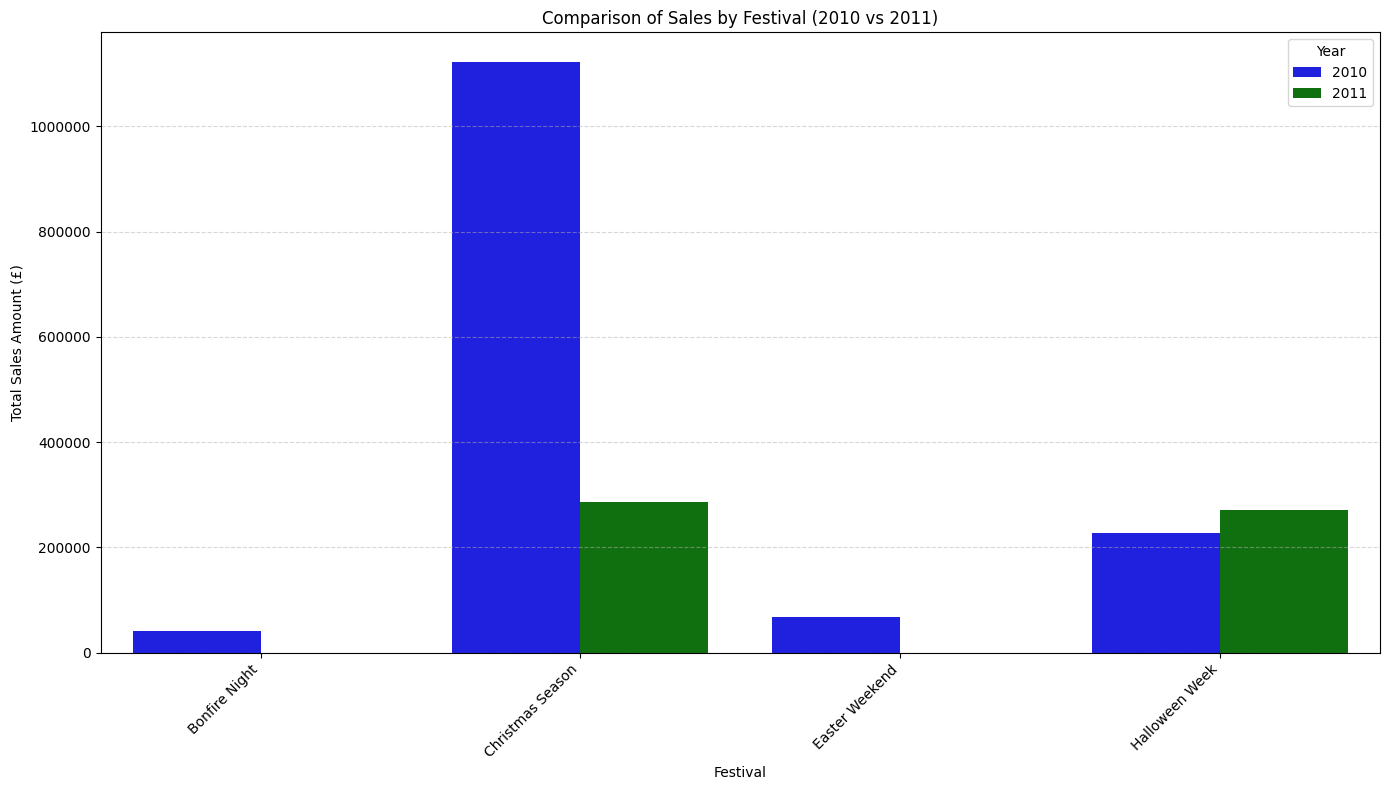

In [17]:
festival_df = df[df['Festival_Status'] == 'Festival'].copy()
plot_data = festival_df.groupby(['Festival_Name', 'Year'])['Sales'].sum().reset_index()


plot_data = plot_data[plot_data['Year'].isin([2010, 2011])]

plt.figure(figsize=(14, 8))
sns.barplot(data=plot_data, x='Festival_Name', y='Sales', hue='Year', palette=['blue', 'green'])

# Add labels and title
plt.title('Comparison of Sales by Festival (2010 vs 2011)')
plt.xlabel('Festival')
plt.ylabel('Total Sales Amount (£)')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()


In [18]:
# calculates total sales of a day
daily_sales = df.set_index('Date')['Sales'].resample('D').sum().reset_index()

# calculates avg daily sales across the dataset 
sales_threshold = daily_sales['Sales'].mean()

# it creates a new column and if sales > avg sale it labels it high otherwise low
daily_sales['Sales_Category'] = np.where(daily_sales['Sales'] > sales_threshold, 'High', 'Low')

# remove the days with 0 sales in our case its saturdays (non bussiness day)
daily_sales = daily_sales[daily_sales['Sales'] > 0]

In [19]:
daily_sales

,Date,Sales,Sales_Category
0,2010-01-04,13450.54,Low
1,2010-01-05,19136.14,Low
2,2010-01-06,8740.69,Low
3,2010-01-07,73035.23,High
4,2010-01-08,30317.80,High
...,...,...,...
694,2011-11-29,48851.68,High
695,2011-11-30,41481.23,High
696,2011-12-01,44533.99,High
697,2011-12-02,44713.69,High


In [20]:
#  "lag" features used to remember the sales from previous days
#  lag_1 will have prev 1 day data and lag_2 have prev 2 days data and so on
for i in range(1, 8):
    daily_sales[f'lag_{i}'] = daily_sales['Sales'].shift(i)

# Create date-based features
daily_sales['dayofweek'] = daily_sales['Date'].dt.dayofweek
daily_sales['month'] = daily_sales['Date'].dt.month
daily_sales['dayofyear'] = daily_sales['Date'].dt.dayofyear

#shift() function creates missing values for the first few rows so we drop them
daily_sales.dropna(inplace=True)


In [21]:
daily_sales

,Date,Sales,Sales_Category,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,dayofweek,month,dayofyear
8,2010-01-12,38903.13,High,19685.34,23248.08,30317.80,73035.23,8740.69,19136.14,13450.54,1,1,12
9,2010-01-13,12409.99,Low,38903.13,19685.34,23248.08,30317.80,73035.23,8740.69,19136.14,2,1,13
10,2010-01-14,23843.47,High,12409.99,38903.13,19685.34,23248.08,30317.80,73035.23,8740.69,3,1,14
11,2010-01-15,13507.54,Low,23843.47,12409.99,38903.13,19685.34,23248.08,30317.80,73035.23,4,1,15
13,2010-01-17,17548.29,Low,13507.54,23843.47,12409.99,38903.13,19685.34,23248.08,30317.80,6,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2011-11-29,48851.68,High,51831.67,17300.96,26674.66,38579.11,71979.93,49664.89,45333.13,1,11,333
695,2011-11-30,41481.23,High,48851.68,51831.67,17300.96,26674.66,38579.11,71979.93,49664.89,2,11,334
696,2011-12-01,44533.99,High,41481.23,48851.68,51831.67,17300.96,26674.66,38579.11,71979.93,3,12,335
697,2011-12-02,44713.69,High,44533.99,41481.23,48851.68,51831.67,17300.96,26674.66,38579.11,4,12,336


In [22]:
from sklearn.model_selection import train_test_split

features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'dayofweek', 'month', 'dayofyear']
X = daily_sales[features]
y = daily_sales['Sales_Category']

#shuffle=False is key for time data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
# start by 5 neighbours 

knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)





In [24]:
from sklearn.metrics import accuracy_score

# 1. Calculate the accuracy by comparing the true labels (y_test) to the predictions (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# 2. Print the accuracy, formatted to two decimal places
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.69


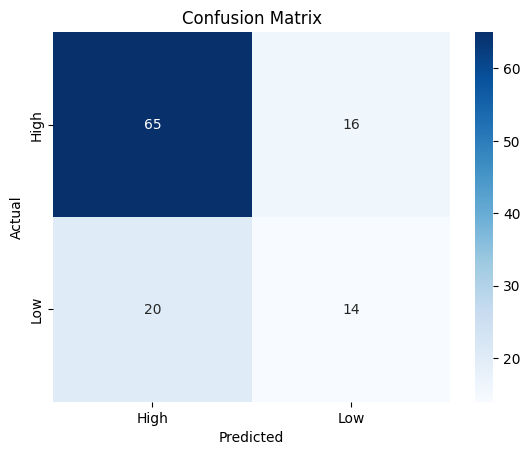

In [25]:
# Visualize the performance with a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['High', 'Low'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()